In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#get dataset

dataset=pd.read_csv('diabetes.csv')

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Find dependent and independent variables

X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
#print(X)
#print(Y)

In [11]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [12]:
#Split dataset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [14]:
#Naive bayes fitting the classifier

from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
#Prediction

Y_pred=classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[138  19]
 [ 36  38]]


In [17]:
accuracy=(cm[0][0]+cm[1][1])/231
print(accuracy)

0.7619047619047619


In [18]:
#summary report

from sklearn.metrics import classification_report

report=classification_report(Y_test,Y_pred,target_names=['NO','YES'])
print(report)



              precision    recall  f1-score   support

          NO       0.79      0.88      0.83       157
         YES       0.67      0.51      0.58        74

   micro avg       0.76      0.76      0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [20]:
import seaborn as sn

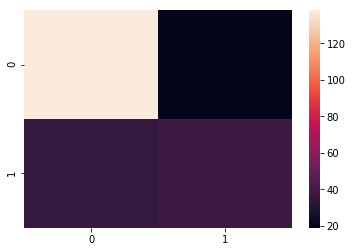

In [21]:
sn.heatmap(cm)